<a href="https://colab.research.google.com/github/Kingestif/Genetic-Programming/blob/main/Task_GP_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Create teh Dataset**

In [ ]:
import itertools

# secret rule & Create all possible combinations of A, B, C (Dataset)
def secret_rule(A, B, C):
    return int((A and not B) or C)

variables = ['A', 'B', 'C']
all_inputs = list(itertools.product([0, 1], repeat=len(variables)))

dataset = []
for inputs in all_inputs:
    output = secret_rule(*inputs)
    dataset.append((inputs, output))

for inputs, output in dataset:
    print(f"Inputs: {inputs} ➔ Output: {output}")


Inputs: (0, 0, 0) ➔ Output: 0
Inputs: (0, 0, 1) ➔ Output: 1
Inputs: (0, 1, 0) ➔ Output: 0
Inputs: (0, 1, 1) ➔ Output: 1
Inputs: (1, 0, 0) ➔ Output: 1
Inputs: (1, 0, 1) ➔ Output: 1
Inputs: (1, 1, 0) ➔ Output: 0
Inputs: (1, 1, 1) ➔ Output: 1


# **Step 2: Random Expression Generator**

In [ ]:
import random

# Terminals & Operators & Function to generate a random expression tree & Generate 5 Random Expressions
terminals = ['A', 'B', 'C']
operators = ['AND', 'OR', 'NOT']

def random_expression(max_depth=3):
    if max_depth == 0 or random.random() < 0.3:
        return random.choice(terminals)
    else:
        op = random.choice(operators)
        if op == 'NOT':
            return ['NOT', random_expression(max_depth-1)]
        else:
            return [op, random_expression(max_depth-1), random_expression(max_depth-1)]

for _ in range(5):
    expr = random_expression()
    print(expr)


['OR', 'A', ['NOT', ['NOT', 'A']]]
['AND', 'B', ['OR', 'C', ['NOT', 'C']]]
['OR', ['OR', ['NOT', 'C'], 'B'], ['NOT', ['AND', 'B', 'B']]]
['OR', 'C', ['AND', 'A', 'A']]
['NOT', 'B']


# **Step 3: Expression Evaluator**

In [ ]:
# evaluate an expression given input values & Check its Fitness
def eval_expr(expr, input_dict):
    if isinstance(expr, str):
        return input_dict[expr]
    elif isinstance(expr, list):
        if expr[0] == 'NOT':
            return int(not eval_expr(expr[1], input_dict))
        elif expr[0] == 'AND':
            return int(eval_expr(expr[1], input_dict) and eval_expr(expr[2], input_dict))
        elif expr[0] == 'OR':
            return int(eval_expr(expr[1], input_dict) or eval_expr(expr[2], input_dict))
    else:
        raise Exception("Unknown expression format!")

def fitness(expr, dataset):
    score = 0
    for inputs, expected in dataset:
        input_dict = dict(zip(variables, inputs))
        output = eval_expr(expr, input_dict)
        if output == expected:
            score += 1
    return score

expr = random_expression()
fit = fitness(expr, dataset)
print("Random Expression:", expr)
print("Fitness Score:", fit, "/", len(dataset))


Random Expression: A
Fitness Score: 5 / 8


# **Step 4: Evolution**

In [ ]:
# Evolution initialize random population
POPULATION_SIZE = 50
GENERATIONS = 50

def generate_population(size):
    return [random_expression() for _ in range(size)]

population = generate_population(POPULATION_SIZE)
print(population)

[['NOT', 'C'], ['AND', ['AND', ['OR', 'B', 'C'], 'C'], ['AND', 'C', 'A']], ['OR', 'C', ['AND', 'B', ['AND', 'A', 'C']]], ['NOT', ['NOT', ['NOT', 'A']]], 'B', ['OR', ['AND', ['OR', 'A', 'A'], ['OR', 'A', 'A']], ['NOT', ['NOT', 'C']]], 'C', ['NOT', 'A'], ['OR', ['NOT', ['NOT', 'B']], ['NOT', 'C']], ['NOT', ['NOT', ['NOT', 'A']]], 'A', ['OR', ['OR', 'B', ['NOT', 'C']], ['AND', 'A', 'A']], ['AND', ['AND', ['AND', 'B', 'A'], ['AND', 'A', 'C']], ['AND', ['NOT', 'A'], ['NOT', 'A']]], 'C', 'C', ['OR', ['OR', ['NOT', 'A'], 'B'], ['NOT', ['AND', 'C', 'A']]], ['AND', 'A', 'A'], ['AND', ['NOT', ['NOT', 'B']], ['OR', 'A', 'A']], ['AND', 'C', ['NOT', 'C']], ['OR', 'C', ['AND', ['NOT', 'C'], ['AND', 'B', 'C']]], 'A', 'B', ['OR', ['NOT', ['OR', 'A', 'C']], ['OR', ['AND', 'B', 'B'], ['NOT', 'A']]], 'C', ['OR', ['AND', 'A', 'A'], ['NOT', 'A']], ['OR', 'B', ['AND', ['AND', 'C', 'A'], ['OR', 'A', 'B']]], ['AND', ['NOT', ['AND', 'A', 'A']], ['NOT', 'B']], ['NOT', ['OR', 'B', ['OR', 'C', 'B']]], ['AND', ['A

In [ ]:
# Select the top N individuals & sort by higher Fitness

def select_best(population, dataset, num_best):
    sorted_population = sorted(population, key=lambda expr: fitness(expr, dataset), reverse=True)
    return sorted_population[:num_best]


In [ ]:
# Mutate an expression randomly
def mutate(expr, max_depth=3):
    if isinstance(expr, str):
        if random.random() < 0.1:
            return random_expression(max_depth)
        else:
            return expr
    elif isinstance(expr, list):
        if random.random() < 0.2:
            return random_expression(max_depth)
        else:
            op = expr[0]
            if op == 'NOT':
                return ['NOT', mutate(expr[1], max_depth-1)]
            else:
                return [op, mutate(expr[1], max_depth-1), mutate(expr[2], max_depth-1)]
    else:
        raise Exception("Unknown expression format!")


Generation 0: Best Fitness = 7
Generation 1: Best Fitness = 7
Generation 2: Best Fitness = 7
Generation 3: Best Fitness = 7
Generation 4: Best Fitness = 7
Generation 5: Best Fitness = 7
Generation 6: Best Fitness = 7
Generation 7: Best Fitness = 7
Generation 8: Best Fitness = 7
Generation 9: Best Fitness = 7
Generation 10: Best Fitness = 8
Generation 11: Best Fitness = 8
Generation 12: Best Fitness = 8
Generation 13: Best Fitness = 8
Generation 14: Best Fitness = 8
Generation 15: Best Fitness = 8
Generation 16: Best Fitness = 8
Generation 17: Best Fitness = 8
Generation 18: Best Fitness = 8
Generation 19: Best Fitness = 8
Generation 20: Best Fitness = 8
Generation 21: Best Fitness = 8
Generation 22: Best Fitness = 8
Generation 23: Best Fitness = 8
Generation 24: Best Fitness = 8
Generation 25: Best Fitness = 8
Generation 26: Best Fitness = 8
Generation 27: Best Fitness = 8
Generation 28: Best Fitness = 8
Generation 29: Best Fitness = 8
Generation 30: Best Fitness = 8
Generation 31: Bes

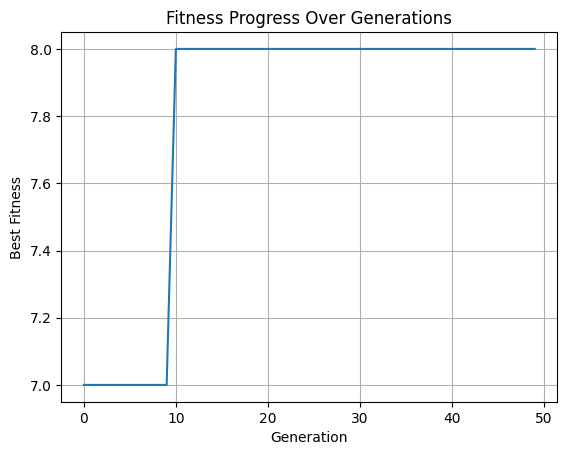

In [ ]:
import matplotlib.pyplot as plt

best_fitness_progress = []

for gen in range(GENERATIONS):
    best = select_best(population, dataset, num_best=10)

    best_score = fitness(best[0], dataset)
    best_fitness_progress.append(best_score)

    new_population = []

    new_population.extend(best)

    while len(new_population) < POPULATION_SIZE:
        parent = random.choice(best)
        child = mutate(parent)
        new_population.append(child)

    population = new_population

    print(f"Generation {gen}: Best Fitness = {best_score}")

# Plot fitness over generations
plt.plot(best_fitness_progress)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Fitness Progress Over Generations')
plt.grid(True)
plt.show()


In [ ]:
# Print the best evolved expression
final_best = select_best(population, dataset, num_best=1)[0]
print("Best evolved expression:", final_best)


Best evolved expression: ['OR', ['AND', ['OR', 'A', 'A'], ['NOT', 'B']], ['NOT', ['NOT', 'C']]]
